# ECE1508 NetSoft Technologies and Enablers Final Project
## Training and Testing Machine Learning Models
- **Ahmed Khan 0998325272**
- **April 15th 2019**

<u>**Table of Contents**</u>
 - <a href="#E0">1. Loading and Cleaning Data</a>
 - <a href="#E1">2. Supervised Model - Logistic Regression</a>
 - <a href="#E2">3. Unsupervised Model - K-Means Clustering</a>

## <a name="E0">1. Loading and Cleaning Data

In this section, we will load the training data collected for Voice, DNS, Telnet, and Ping data from traffic_classifier.py script. We will clean the data for usability with the Machine Learning models.

#### Install necessary libraries
First we will install the necessary libraries to run the following code.

In [74]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

#### Importing libraries
Then we will import the libraries we need to run the following code.

In [75]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Filter warnings
# Warning.filterwarnings('ignore') #filter warnings
# # Show plots inline
# %matplotlib inline

#### Loading Data
Here we load the CSV data collected from the Python script into pandas dataframe

In [76]:
dataset_location = '/home/xp/trafficclassifier/dataset/'
ping_df = pd.read_csv(dataset_location+'ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv(dataset_location+'voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv(dataset_location+'dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv(dataset_location+'telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

#### Cleaning Data
Drop any rows that contain NaN (this happens when the training script ends abruptly)

In [77]:
df.dropna(inplace=True)

Drop the Forward Packets, Forward Bytes, Reverse Packets, Reverse Bytes data. This data increases linearly and at a certain point in time can be any value so it is not helpful as a feature in the model. 

In [78]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

#### Describing Data

Now we have 5242 rows and 13 columns (12 features, 1 target)

In [79]:
print(df.shape)

(4338, 13)


We can take a look at basic statistical information about our data now.

In [80]:
df.describe()

Delta Forward Packets  Delta Forward Bytes  \
count            4338.000000          4338.000000   
mean                9.232365           803.705164   
std                29.976994          2640.897638   
min                 0.000000             0.000000   
25%                 0.000000             0.000000   
50%                 0.000000             0.000000   
75%                 1.000000            98.000000   
max               211.000000         18581.000000   

       Forward Instantaneous Packets per Second  \
count                               4338.000000   
mean                                   9.170816   
std                                   29.866778   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    1.000000   
max                                  211.000000   

       Forward Average Packets per second  \
count                         4338.000000   
mean                             7.170775   
std                             11.424792   
min                              0.000000   
25%                              0.901639   
50%                              0.983333   
75%                             12.337151   
max                             76.750000   

       Forward Instantaneous Bytes per Second  \
count                             4338.000000   
mean                               798.270401   
std                               2631.161953   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                 98.000000   
max                              18581.000000   

       Forward Average Bytes per second  Delta Reverse Packets  \
count                       4338.000000            4338.000000   
mean                         621.331002              20.970032   
std                         1007.323566              33.876419   
min                            0.000000               0.000000   
25%                           61.538462               0.000000   
50%                           67.100000               1.000000   
75%                         1082.847732              49.000000   
max                         6711.000000             210.000000   

       Delta Reverse Bytes  DeltaReverse Instantaneous Packets per Second  \
count          4338.000000                                    4338.000000   
mean           2481.755187                                      20.873444   
std            3609.577650                                      33.795630   
min               0.000000                                       0.000000   
25%               0.000000                                       0.000000   
50%             140.000000                                       1.000000   
75%            7062.000000                                      49.000000   
max           15484.000000                                     210.000000   

       Reverse Average Packets per second  \
count                         4338.000000   
mean                            18.789556   
std                             18.851725   
min                              0.000000   
25%                              1.404901   
50%                             13.168831   
75%                             44.532258   
max                             76.500000   

       Reverse Instantaneous Bytes per Second  \
count                             4338.000000   
mean                              2474.273859   
std                               3606.694819   
min                                  0.000000   
25%                                  0.000000   
50%                                140.000000   
75%                               7029.000000   
max                              15484.000000   

       Reverse Average Bytes per second  
count                       4338.000000  


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Delta Forward Packets                          4338 non-null   int64  
 1   Delta Forward Bytes                            4338 non-null   int64  
 2   Forward Instantaneous Packets per Second       4338 non-null   float64
 3   Forward Average Packets per second             4338 non-null   float64
 4   Forward Instantaneous Bytes per Second         4338 non-null   float64
 5   Forward Average Bytes per second               4338 non-null   float64
 6   Delta Reverse Packets                          4338 non-null   int64  
 7   Delta Reverse Bytes                            4338 non-null   int64  
 8   DeltaReverse Instantaneous Packets per Second  4338 non-null   float64
 9   Reverse Average Packets per second             4338 

The type of the traffic column is object. We will convert this to a category so we can use `.cat` functionalities (Functions specific to categories).

In [82]:
df['Traffic Type'] = df['Traffic Type'].astype('category')

We can view all the types using `.cat.categories`:

In [83]:
df['Traffic Type'].cat.categories

Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

We can also get the data coded numerically using `.cat.codes`

In [84]:
df['Traffic Type'].cat.codes.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

The following features will be used in the model

In [85]:
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


These are the counts of each type of traffic

In [86]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


telnet    1181
dns       1154
voice     1137
ping       866
Name: Traffic Type, dtype: int64

## <a name="E1"> 2. Supervised Model - Logistic Regression 

Now we will train a logistic regression model on this dataset by splitting it into a training and testing set. 

#### Split dataset
First we will split the dataset into features and targets.

In [87]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

#### Create training and testing sets
We will use train_test_split with test size of 0.3 to put 70% of our data into training, and 30% into testing. The random_state is set so the results are repeatable.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=101)

#### Train model
Now we will create and train the model.

In [89]:
model = LogisticRegression()

In [90]:
model.fit(X_train,y_train)

/home/xp/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Make predictions
Single prediction

In [91]:
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

In [92]:
single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted dns and it was actually dns


/home/xp/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Entire test set

In [93]:
predictions = model.predict(X_test)

We can create a dataframe to see these in table form:

In [94]:
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

true predicted
2825     dns       dns
1685   voice     voice
2242     dns       dns
2898     dns       dns
4334  telnet    telnet

We see the model has a <b>99.68%</b> accuracy

In [95]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.26%


We can save the model using the pickle library to use later in real-time

In [96]:
print(pickle.format_version) #check the version of pickle

4.0


In [97]:
pickle.dump(model,open('LogisticRegression','wb')) #save the model

#### Confusion Matrix
The confusion matrix allows you to see the numerical breakdown of the predictions by class:

In [98]:
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

[[554   1   0   3]
 [  2 434   1   0]
 [  0   8 583   0]
 [  1   0   0 582]]


To attach labels, we can view it as a dataframe:

In [99]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

        dns  ping  telnet  voice
dns     554     1       0      3
ping      2   434       1      0
telnet    0     8     583      0
voice     1     0       0    582


/tmp/ipykernel_2982/2343123434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))
/tmp/ipykernel_2982/2343123434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))
/tmp/ipykernel_2982/2343123434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))
/tmp/ipykernel_2982/2343123434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))


We can also add a heatmap to better visualize it

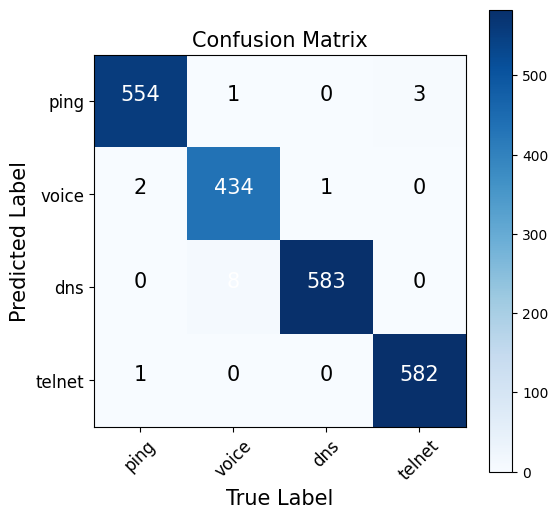

In [100]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)


We can see the model works well for all classes.

#### Principal Component Analysis

Principal Component Analysis (PCA) is a dimension reduction technique. It decomposes your data into principal components where each principal component tries to explain as much variance left as possible in the data, in decending order. E.g., PC1 will explain as much variance as possible, PC2 will try to explain as much of the variance left as possible after the PC1 rotation is applied and so on. Each principal component is a combination of your existing components.

This will allow us to visualize this higher dimensional data in a lower dimensional space.

#### Normalize data
Here we will scale the data so that they are within the same range. For PCA to work correctly and find the right covariance amongst all the features we need to scale the data so that they are within the same range. This will keep one feature from contributing more to the final components.

The StandardScaler class from sklearn will remove the mean and scale the data so the have unit variance.

In [101]:
df.drop('Traffic Type',axis=1).values[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Here are the means/std per feature.

In [102]:
df.drop('Traffic Type',axis=1).values.mean(axis=0)

array([   9.23236515,  803.70516367,    9.17081604,    7.17077483,
        798.27040111,  621.33100167,   20.97003227, 2481.75518672,
         20.87344398,   18.78955622, 2474.27385892, 2329.65660332])

In [103]:
df.drop('Traffic Type',axis=1).values.std(axis=0)

array([  29.97353903, 2640.59322885,   29.86333527,   11.42347502,
       2630.85866651, 1007.2074547 ,   33.87251376, 3609.16158463,
         33.791734  ,   18.84955206, 3606.27908562, 2864.80618911])

Here, we fit the scaler.

In [104]:
scaler = StandardScaler()
scaler.fit(df.drop('Traffic Type',axis=1))

StandardScaler()

In [105]:
scaled_data = scaler.transform(df.drop('Traffic Type',axis=1))
scaled_data[0:5]

array([[-0.30801719, -0.30436538, -0.30709283, -0.62772272, -0.3034258 ,
        -0.61688483, -0.61908698, -0.68762651, -0.61770858, -0.99681712,
        -0.6861016 , -0.81319868],
       [-0.30801719, -0.30436538, -0.30709283, -0.62772272, -0.3034258 ,
        -0.61688483, -0.61908698, -0.68762651, -0.61770858, -0.99681712,
        -0.6861016 , -0.81319868],
       [-0.30801719, -0.30436538, -0.30709283, -0.62772272, -0.3034258 ,
        -0.61688483, -0.61908698, -0.68762651, -0.61770858, -0.99681712,
        -0.6861016 , -0.81319868],
       [-0.30801719, -0.30436538, -0.30709283, -0.62772272, -0.3034258 ,
        -0.61688483, -0.61908698, -0.68762651, -0.61770858, -0.99681712,
        -0.6861016 , -0.81319868],
       [-0.30801719, -0.30436538, -0.30709283, -0.62772272, -0.3034258 ,
        -0.61688483, -0.61908698, -0.68762651, -0.61770858, -0.99681712,
        -0.6861016 , -0.81319868]])

Here are the new means and standard deviation per feature.

In [106]:
scaled_data.mean(axis=0)

array([ 2.62072010e-17,  0.00000000e+00,  5.24144019e-17,  5.24144019e-17,
        0.00000000e+00, -1.04828804e-16,  6.55180024e-17,  2.62072010e-17,
        3.93108014e-17, -2.62072010e-17, -1.04828804e-16,  1.04828804e-16])

In [107]:
scaled_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now we will fit PCA model to the data. We will specify n_components=2, because we only want the first 2 principal components.

In [108]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [109]:
scaled_data.shape

(4338, 12)

In [110]:
x_pca = pca.transform(scaled_data)

In [111]:
x_pca.shape

(4338, 2)

#### Explained Variance

In [112]:
pca.explained_variance_ratio_

array([0.55002845, 0.289019  ])

In [113]:
pca.explained_variance_ratio_.sum()*100

83.9047453104168

From above you can see that our first 2 principal components explain 84.16% of the variance in our data. We can get higher variance explained by increasing the number of principal components to a maximum of 100% with n_components = n_features.

#### Plotting the principal components

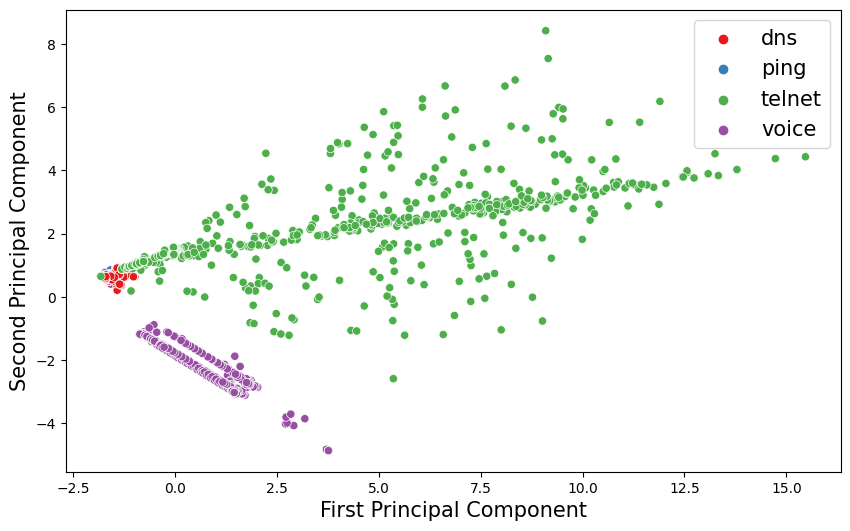

In [114]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=x_pca[:,0], y=x_pca[:,1], hue='Traffic Type', palette='Set1')
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.legend(fontsize=15)

From this plot, we can see voice and ping are easy to identify using first 2 principle components. Ping and DNS are difficult. That is why we use all the features in our data not just first two components. 

#### Decision Boundary w/ PCA
The decision boundary is where the model switches from predicting one class to another. For visual representation purposes, we will again use the principal components we computed above for training. This way we can train a model with 2 features, and visualize the decision boundary in 2D space. However, the real model will use all the features and so the decision boundary may be different. 

We will follow the same steps as above for training a model. We use the coded y as the contour plot that we use below prefers numerical values.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y.cat.codes,test_size=0.3, random_state=101)

In [116]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

As discussed above, the accuracy value is lower when we only use the first 2 principle components as opposed to the full set of features. Again, this is just for visualization purposes.

In [117]:
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 96.85%


#### Plotting
We will first generate a grid of x[0] and x[1] values that we will use to make predictions with.

In [118]:
x_min = x_pca[:,0].min()
x_max = x_pca[:,0].max()
y_min = x_pca[:,1].min()
y_max = x_pca[:,1].max()
spacing = 0.01

In [119]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing))

Now we will make predictions on the grid that we created. The `ravel` function just makes the 2D array that we have above into a 1D array. We will reshape the predictions Z into a 2D array afterwards for plotting

In [120]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Now we will plot the data, and the decision boundaries.

/home/xp/.local/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


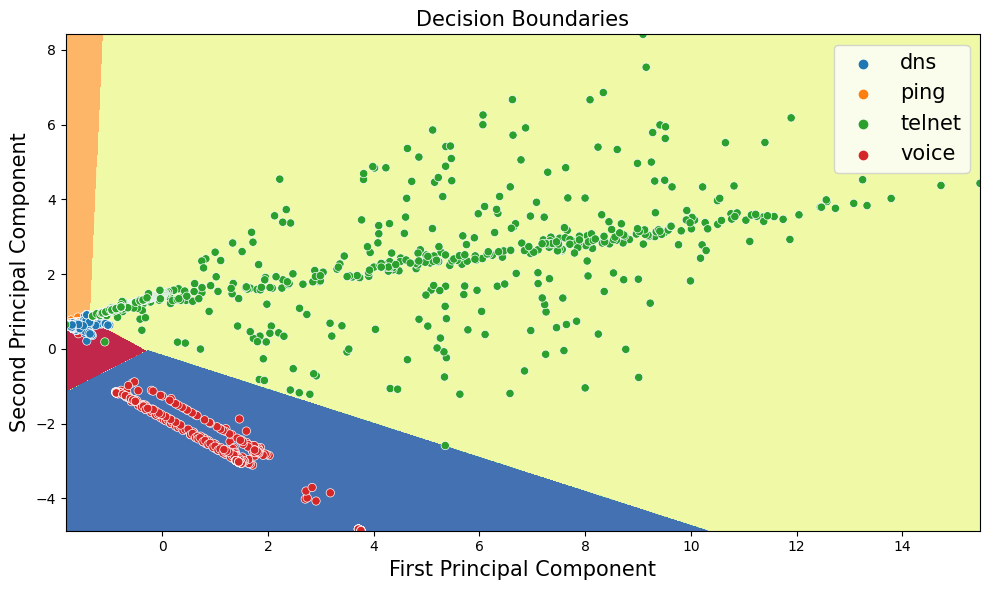

In [121]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
sns.scatterplot(data=df,x= x_pca[:,0],y= x_pca[:,1], hue=df['Traffic Type'], cmap=plt.cm.Spectral)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)

From the above you can see the decision splits. Voice and Telnet traffic are easily classifiable. Ping and DNS are harder to distinguish with only 2 components. 

## <a name="E2"> 3. Unsupervised Model - K-Means Clustering

Now we will train a K-means clustering model on this dataset.

#### Build model
Here we will build a `sklearn KMeans` model with 4 possible clusters for each type of traffic:

In [122]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

In [123]:
model = KMeans(n_clusters=len(y.cat.categories))

#### Train & predict

In [124]:
clusters = model.fit_predict(X)

/home/xp/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Evaluate generated clusters

#### Shape of clusters

In [125]:
model.cluster_centers_.shape

(4, 12)

We see that there are 4 clusters in 12 dimensions. 

#### Visualize clusters
Let's visualize each of these cluster centers to see what they represent. The 12 size vector is reshaped into a 4x3, and visualized using matplotlib.

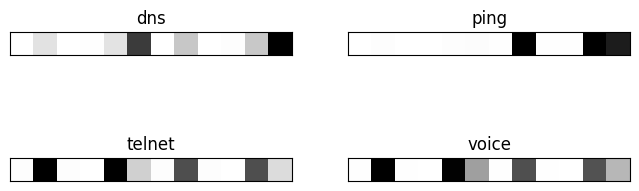

In [126]:
fig = plt.figure(figsize=(8, 3))
for i in range(len(y.cat.categories)):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    ax.set_title(str(y.cat.categories[i]))
    ax.imshow(model.cluster_centers_[i].reshape((1, 12)), cmap=plt.cm.binary)

From the above we can see which features Kmeans looks for to differentiate the traffic types

#### Evaluate accuracy of model

In [127]:
df['Traffic Type'].value_counts()

telnet    1181
dns       1154
voice     1137
ping       866
Name: Traffic Type, dtype: int64

In [128]:
y_codes = y.cat.codes
y_codes.tolist().count(0) #DNS

1154

In [129]:
y_codes.tolist().count(1) #Ping

866

In [130]:
y_codes.tolist().count(2) #Telnet

1181

In [131]:
y_codes.tolist().count(3) #Voice

1137

In [132]:
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'dns'
    elif clusters[i]==1: strlabels[i] = 'ping'
    elif clusters[i]==2: strlabels[i] = 'telnet'
    elif clusters[i]==3: strlabels[i] = 'voice'

Accuracy:

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y, strlabels)*100.0

30.382664822498846

The accuracy is very poor at just <b>%30.54</b>. With only 4 possible cluster labels, the model is pretty much guessing the right label. We will see why using PCA analysis

#### Plot results with PCA
Let's use PCA visualization and look at the true cluster labels and the K-means cluster labels. PCA is a dimensionality reduction technique which will allow us to plot the results in 2D.

Apply PCA to reduce dimensions to 2D:

In [134]:
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

Plot clusters from PCA and true labels:

In [135]:
y_codes =  np.asarray(y.cat.codes)

In [136]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

[0 0 0 ... 0 0 0]


/tmp/ipykernel_2982/1242188229.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = stats.mode(y_codes[mask])[0]


In [137]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');

/tmp/ipykernel_2982/435118299.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),


We can see here the the KMeans model is not labelling accurately. It is splitting voice into two labels and incorrectly labelling half of telnet flows. This is because KMeans works well with circular clusters and our traffic data appears to be more linear in shape. 

#### Confusion Matrix

In [138]:
cm=confusion_matrix(y, strlabels, labels=['ping','voice','dns','telnet'])
cm

array([[   0,    0,  866,    0],
       [1022,    0,  115,    0],
       [   0,    0, 1154,    0],
       [  22,  180,  815,  164]])

In [139]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

The confusion matrix further shows how poorly our model performs. Usually we expect high numbers along the diagonal. 

Dumping the model for real-time use later

In [140]:
pickle.dump(model,open('KMeans_Clustering','wb'))

### Support Vector Machine

In [141]:
#using SVM on df dataset to predict the traffic type
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pickle

X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Accuracy: %.2f%%' % (accuracy_score(y_pred,y_test)*100))

pickle.dump(svclassifier,open('SVM','wb'))

       
        


[[173 136  22   0]
 [  2 260   0   0]
 [  0   0 356   0]
 [  0   0   0 353]]
              precision    recall  f1-score   support

         dns       0.99      0.52      0.68       331
        ping       0.66      0.99      0.79       262
      telnet       0.94      1.00      0.97       356
       voice       1.00      1.00      1.00       353

    accuracy                           0.88      1302
   macro avg       0.90      0.88      0.86      1302
weighted avg       0.91      0.88      0.87      1302

Accuracy: 87.71%


In [142]:
#show the confusion matrix
cm=confusion_matrix(y_test,y_pred, labels=['ping','voice','dns','telnet'])
cm

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    #get name of the class

    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)



### Random Forest 

In [143]:
#use the Random Forest Classifier to predict the traffic type
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pickle

X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Accuracy: %.2f%%' % (accuracy_score(y_pred,y_test)*100))

pickle.dump(rfc,open('Random_Forest','wb'))



[[329   1   1   0]
 [  0 262   0   0]
 [  0   0 356   0]
 [  0   0   0 353]]
              precision    recall  f1-score   support

         dns       1.00      0.99      1.00       331
        ping       1.00      1.00      1.00       262
      telnet       1.00      1.00      1.00       356
       voice       1.00      1.00      1.00       353

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302

Accuracy: 99.85%


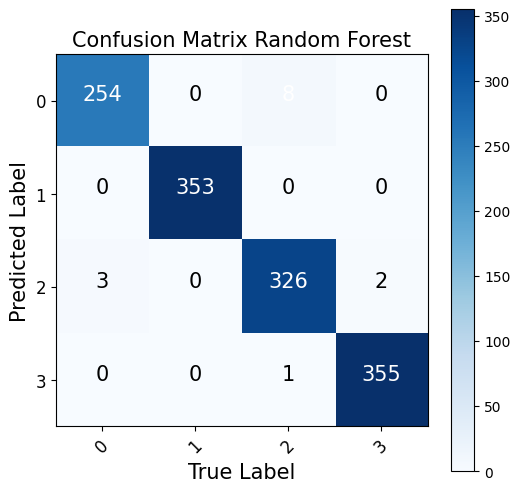

In [155]:
#show the confusion matrix
cm=confusion_matrix(y_test,y_pred, labels=['ping','voice','dns','telnet'])
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random Forest', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5: 
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

# 1 - ping
# 2 - voice
# 3 - dns
# 4 - telnet
#explain the results of the confusion matrix

### Neural Network

In [148]:
#use neural network to predict the traffic type
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pickle

X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Accuracy: %.2f%%' % (accuracy_score(y_pred,y_test)*100))

pickle.dump(mlp,open('Neural_Network','wb'))



[[326   3   2   0]
 [  8 254   0   0]
 [  1   0 355   0]
 [  0   0   0 353]]
              precision    recall  f1-score   support

         dns       0.97      0.98      0.98       331
        ping       0.99      0.97      0.98       262
      telnet       0.99      1.00      1.00       356
       voice       1.00      1.00      1.00       353

    accuracy                           0.99      1302
   macro avg       0.99      0.99      0.99      1302
weighted avg       0.99      0.99      0.99      1302

Accuracy: 98.92%


### Show the Confusion Matrix for Neural Network

In [154]:
#show the confusion matrix
cm=confusion_matrix(y_test,y_pred, labels=['ping','voice','dns','telnet'])
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix Neural Network Model', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5: 
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
        

In [152]:
#Compare the accuracy of the four models
import matplotlib.pyplot as plt
import numpy as np

objects = ('LogisticRegression', 'SVM', 'Random Forest', 'Neural Network')
y_pos = np.arange(len(objects))
performance = [99.26, 87.71, 99.85, 98.92]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy of the four supervised models')

plt.show()
